<img src="./logo_UTN.svg" align="right" width="150" />
#### Documentación Procesamiento estadístico

# Estudio de Modelo de Regresión Lineal,Hipótesis y Clasificación.
#### Lucas Bautista



# Herramientas de Análisis

Para estudiar los datos provistos, se hace uso de la herramienta [pandas](https://pandas.pydata.org/) la cual facilita el acceso a los mismos y permite controlar en tiempo de desarrollo el data-frame sin necesidad de acceder al mismo, lo cual resulta muy útil cuando la información está presentada en un formato no legible "e.g" en un formato binario.

Dado que vamos a trabajar con datos que serán tomados como caracteres en lugar de números es necesario implementar una función que permita reconocer si estos strings son números, la función **is_number** se encargará de informar dicha condición.

Por otro lado, gran parte de los test estadísticos necesitaran de datos que se encuentren normalizados, ya que comparan  nuestro set de datos contra la distribución normal, para lograr dicho ajuste, estimaremos la media de los datos, removemos la misma a cada valor y dividiremos por la desviación estándar **norm_data**,luego verificaremos si efectivamente dicho set de datos sigue una distribución normal.

\begin{equation}
\\
\end{equation}
\begin{equation}
\\
 X = [x_1,x_2...x_n]
 \\
\end{equation}

\begin{equation}
 \\
 X_{N} = \frac{X - \mu_x}{\sigma_x}
\end{equation}
\begin{equation}
\\
\end{equation}

No sabemos qué tipo de imagen nos podemos encontrar, dado que el dataset contiene imágenes tanto en *".jpg"*,*".png"* y *".tif"*. por lo que implementaremos una función(**open_image**) la cual pruebe abrir estos 3 formatos de imagen, simplemente recibirá un path y concatenarla cada uno de estos formatos al mismo, luego probará hasta tener un resultado válido, en caso de que no exista dicha imagen, volverá a preguntar con un nuevo formato, el orden de prioridad de formatos, es el mencionado anteriormente.

En algún momento va a ser necesario realizar una clasificación de los datos dependiendo de su categoría, para ello la función **clasificador** implementa un algoritmo de búsqueda lineal y devolverá un vector con los datos correspondientes a la clase pedida


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
import cv2
import sys

#%% Funciones: Filtrado de String y normalizacion de datos
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

def norm_data(data):
    return (data-data.mean())/data.std()

def open_image(path):
    image = cv2.imread(path + ".jpg")
    if (image is None):
        image = cv2.imread(path + ".png")
        if(image is None):
            image = cv2.imread(path + ".tif")
            if(image is None):
                sys.exit("%s___no se pudo read"%(path))
    return image

def clasificador(data,list_class,name_class):
    #quiero devolver un vector,con los datos en funcion de la clase
    output = []
    for i in range(0,data.size):
        if(list_class[i]==list_class[i]):
            if(name_class == list_class[i]):
                output.append(np.array([data[i]]))
    return output

## Set de Datos (data_celulas.csv)

El archivo que contiene el set de datos, es en realidad, un mapa el cual permite conocer no solo la ubicación de la captura de la célula dentro de la base de datos, sino que además brinda información respecto a parámetros vinculados con su grado de lateralización, así como también condiciones en las que se realizó el experimento, condiciones de la muestra y tipo de tratamiento aplicada a la misma.

**DIR**: Corresponde al directorio en el cual se encuentra la captura de la célula, podemos encontrar dos grupos bien diferenciados **X20** y **X40** esto se debe a que existen capturas tomadas con una distinto aumento de microscopio, siendo **X20** un aumento de 20 veces y **X40** un aumento de 40 veces. por lo que es esperable que las capturas de X20 cubran mayor superficie de la célula a las de X40.

**SNAP**: el el código asignado a la captura, o bien parte del nombre del archivo, con parte se refiere a que en la misma no se especifica el formato, razón por la cual se implementa la función **open_image**.

**AREA_TT_OV_TOTAL(ATT/TOTAL)**: parámetro proporcional a la lateralización medida en relación al área de célula en término terminal(periferia) respecto al área total de la misma

**IOD_OV_TOTAL(IODTT/TOTAL)**: parámetro proporcional a la lateralización medida en relación a la intensidad lumínica de pixeles en término terminal(periferia) respecto a la intensidad lumínica total

**periodo exptal**: Condiciones a las que se somete el tejido a la hor de realizar el experimento, dichas condiciones también información respecto al tiempo transcurrido

**TTO**: tipo de tratamiento sobre el tejido, en este identificamos 4 grandes grupos(control,Mel,Luz y Mel+Luz)

Aquellos argumentos que figuran como '*nan*' son argumentos que no fueron completados por los cual los tomamos como atributos desconocidos


In [18]:
#%% Carga De Datos
df = pd.read_csv("data_celulas.csv")
n_df = df[['AREA_TT_OV_TOTAL','IOD_TT_OV_TOTAL']]
Area_TT_sobre_Total = np.array(df.AREA_TT_OV_TOTAL)
IOD_TT_total = np.array(df.IOD_TT_OV_TOTAL)
Classes = np.array(df.TTO)
paths = 'data' + '/train'+'/'+np.array(df.DIR)+'/'+np.array(df.SNAP)

#mostrar algunos elementos de la tabla
df[['DIR','SNAP','AREA_TT_OV_TOTAL','IOD_TT_OV_TOTAL','perido exptal','TTO']]

,DIR,SNAP,AREA_TT_OV_TOTAL,IOD_TT_OV_TOTAL,perido exptal,TTO
0,x20,SNAP-084411-0015,45.40,45.6,25´recup,control
1,x20,SNAP-084919-0018,38.33,- RELEER,25´recup,control
2,x20,SNAP-084437-0016,31.01,32.86,25´recup,control
3,x40,SNAP-191920-0004,71.76,71.44,25´recup,control
4,x40,SNAP-191751-0001,79.25,80.09,25´recup,control
5,x20,SNAP-091746-0036,57.44,58.38,25´recup,control
6,x20,SNAP-090416-0028,56.17,56.90,25´recup,control
7,x20,SNAP-090157-0024,37.32,37.95,25´recup,control
8,x20,SNAP-084919-0018,38.33,NaN,25´recup,control
9,x20,SNAP-084949-0020,33.28,33.29,25 min,control


## Hipótesis de Partida

A priori se supone que tanto las magnitudes ATT/total e IODTT/total son coeficientes vinculados a la lateralización, por lo que pre-suponemos que nuestro mensurando es obtenido a partir de dos métodos distintos, es decir estamos en presencia de dos variables las cuales se encargan de medir exactamente la misma magnitud. Dado a que se trata de coeficientes normalizados con el total(es decir no poseen unidades y su rango de valores comprendidos es de 0 a 100%). y sabiendo que la forma de medición se realizó con un procedimiento humano ayudándose con herramientas computarizadas, dicha información nos da la pauta de que si analizamos ambas variables y la relación que guardan ante ellas, deberíamos encontrar una fuerte correlación lineal.

Mas no así no podemos decir nada a priori a partir de si es posible establecer un modelo lineal entre las mismas, dichas afirmaciones deberán comprobarse mediante el análisis de las hipótesis del modelo lineal, las cuales implican, de forma principal y verificable, un estudio de normalidad en los set de datos y homocedasticidad.

tampoco podemos suponer cuál será la naturaleza de los set de datos formados a partir de la clasificación, puesto que los ejemplos son muy limitados en número. Razón por la cual un estudio de factibilidad para determinar un modelo lineal resulta innecesario y se procederá directamente al análisis de sus histogramas a fin de encontrar modos que permitan definir umbrales de clasificación, dichos umbrales compondrán a futuro las etiquetas en los ejemplos para entrenar a la red.

## Filtrado de datos.

Existen casos con los que contamos con ATT/total pero no con IODTT/total y viceversa, para un estudio de correlación lineal es necesario disponer de ambas magnitudes y para un estudio independiente, solo con contar con una de ellas es suficiente, por ello procedemos a separar dichos datos y ubicarlos en zonas de memoria independientes, dejando así un buffer para ATT/total otro para IODTT/total y el último para ATT/total e IODTT/total,denominado arbitrariamente **scatter**, donde cada posición de memoria corresponde a una muestra tomada. a su vez con este procedimiento eliminamos la contaminación en los datos, la cual en nuestro caso consiste de cualquier magnitud que no sea un numero,cuando deberia serlo, o esté incompleta(*nan*), en caso de que sea una variable a estudiar, se descarta y en caso de que se trate de un estudio simultáneo de variables, con solo la falta de una también se descarta.

a su vez cargamos una lista de rutas de imagen por lo que nuestras zonas de memoria y la clase y tratamiento a la que pertenecen por lo que los buffers  no poseen solo los valores numéricos sino que extraen la información de la primer tabla y la asocian al tipo de estudio sobre la variable a analizar. Una vez filtrados los datos procedemos a extraer la información numérica, sin clasificar, para el análisis estadístico nuevamente los ubicamos en buffers independientes.


In [19]:
#%% Filtrado de Datos
IOD_TT_total_filter = []
Area_TT_sobre_Total_filter = []
aty_paths_list = []
scatter = []
flag_1 = 0
flag_2 = 0

#filtro los datos que no esten completos extraigo los numeros y armo el vector para el scatter
for i in range(0,IOD_TT_total.size):
    #me fijo de que no sea un nan
    if(IOD_TT_total[i]==IOD_TT_total[i]):
        #si no es un nan ahora me fijo que corresponda a un numero
        if(is_number(IOD_TT_total[i])):
            #corresponde a un numero entonces lo guardo
            flag_1 = 1
            temp_n1 = float(IOD_TT_total[i])
            IOD_TT_total_filter.append([temp_n1,i,Classes[i]])
    #me fijo de que no sea un nan
    if(Area_TT_sobre_Total[i]==Area_TT_sobre_Total[i]):
        #si no es un nan ahora me fijo que corresponda a un numero
        if(is_number(Area_TT_sobre_Total[i])):
            #corresponde a un numero entonces lo guardo
            flag_2 = 1
            temp_n2 = float(Area_TT_sobre_Total[i])
            Area_TT_sobre_Total_filter.append([temp_n2,i,Classes[i]])
    
    if(flag_1!=0 and flag_2 !=0):
        #significa que ambos son numeros
        ##aca me tengo que guardar el directorio, cosa de ir a buscar los atipicos despues
        scatter.append(np.array([temp_n2,temp_n1,i,Classes[i]]))
        aty_paths_list.append(paths[i])
    #reseteo los flags
    flag_1 = 0
    flag_2 = 0


IOD_TT_total_filter = np.array(IOD_TT_total_filter).transpose()
Area_TT_sobre_Total_filter = np.array(Area_TT_sobre_Total_filter).transpose()
scatter = np.array(scatter).transpose()

#%% me mquedo solo con los datos, para el procesamiento

IOD_TT_total_filter_data = np.array([IOD_TT_total_filter[0]]).astype(np.float64)[0]
Area_TT_sobre_Total_filter_data = np.array([Area_TT_sobre_Total_filter[0]]).astype(np.float64)[0]
scatter_data = np.array([scatter[0],scatter[1]]).astype(np.float64)

# Correlación y modelo de regresión lineal

El mismo se utiliza para verificar si dos variables aleatorias tienen una dependencia lineal una con la otra, a su vez puede cuantificarse que tan correcto es dicho estudio y el error cometido en el mismo, (mas informacion [aqui](https://en.wikipedia.org/wiki/Correlation_and_dependence)). La herramiena [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), simplifica la matematica necesaria para estimar la pendiente **$m$** y ordenada al origen **$b$** de la recta de regresión lineal entre ambas variables aleatorias.

Una vez obtenida la pendiente y ordenada al origen se procede a la construcción de un modelo lineal. por simplicidad se renombran las variables, ya se sabe que están normalizados y a partir de ahora las mencionaremos como ATT e IODTT a ATT/total e IODTT/total respectivamente.

El modelo planteado propone que tanto ATT e IODTT dependen linealmente una con la otra es decir ante el incremento de una se realizara el incremento de la misma, esto no es posible afirmarlo, por lo que a este modelo se le incorpora un nuevo término de error, denominado **$n$** el cual, será el responsable de determinar los errores que este modelo pueda llegar a generar. Para el estudio de linealidad resulta indistinto que variable se adopte como dependiente e independiente ya que en este caso no se dispone de ningún criterio lógico.

\begin{equation}
\\
\end{equation}

\begin{equation}
\\
 y = m.A_{TT} + b + n
 \\
\end{equation}

\begin{equation}
\\
 n = IOD_{TT} - y
 \\
\end{equation}

Graficamos el modelo contra las mediciones tomadas en un gráfico del tipo scatter y a su vez el error del mismo en función del número de muestra tomado, no hay que confundir que el mínimo valor de muestra representa el primer valor en el gráfico de error de modelo, ya que sus ejes son diferentes uno muestra la relación entre ambas variables aleatorias y el segundo las diferencias que existen entre cada muestra del dataset.Contrarrestando el modelo contra las mediciones, y observando los valores de score del estudio, puede apreciarse una fuerte correlación entre ambas variables, siendo que el error **$n$** de modelo lineal no resulta tan grosero, llegando a un máximo de 3% por exceso(parte positiva) y menos de 2% por defecto(parte negativa). en base a dichas discrepancias o máximos es posible identificar los atípicos que menos responden a este modelo.


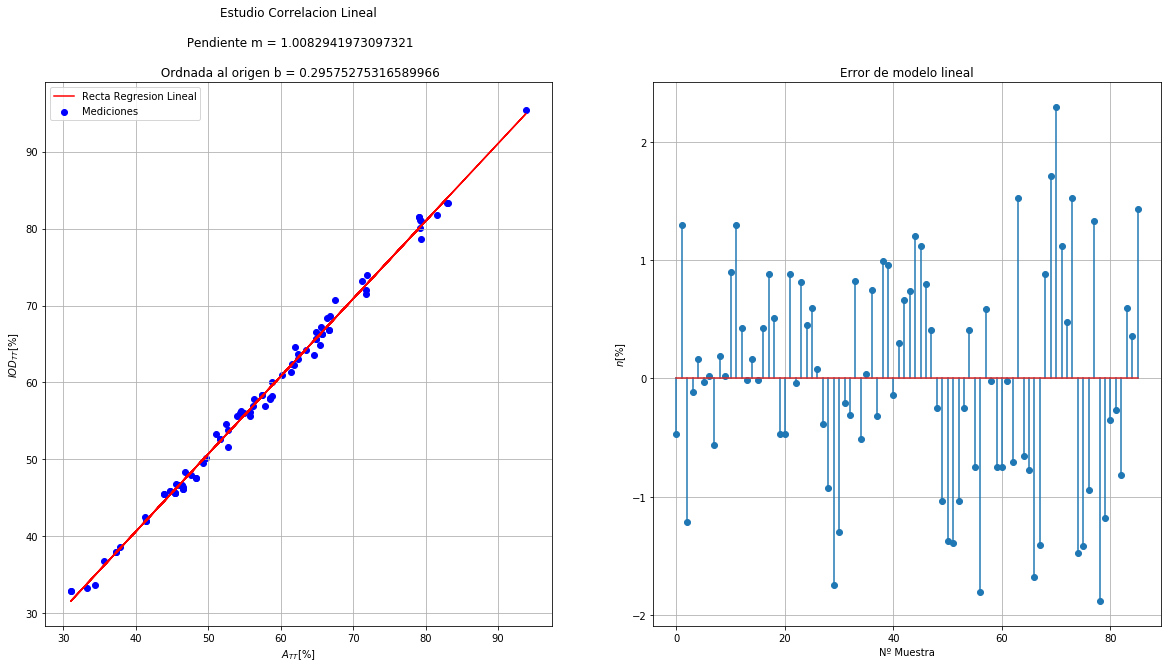

In [20]:
#modelo de regresion lineal
correlation_score = stats.linregress(scatter_data[0],scatter_data[1])
x = scatter_data[0]
#busco una relacion lineal entre ambos modelos
y = correlation_score[0]*x + correlation_score[1]
#calculo el ruido de la mediocion con la recta de regresion lineal
n = scatter_data[1] - y

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("Estudio Correlacion Lineal\n\n Pendiente m = %s\n\n Ordnada al origen b = %s"
          %(correlation_score[0],correlation_score[1]))
plt.plot(x,y,color = 'red',label = 'Recta Regresion Lineal')
plt.scatter(scatter_data[0],scatter_data[1],color='blue',label = 'Mediciones')
plt.xlabel("$A_{TT} [\%]$")
plt.ylabel("$IOD_{TT}[\%]$")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Error de modelo lineal")
plt.stem(n)
plt.xlabel("Nº Muestra")
plt.ylabel("$n[\%]$")
plt.grid(True)

# Verificación de Hipótesis de modelo de Regresión Lineal

No solo alcanza con una fuerte correlación lineal para definir que un modelo de regresión lineal tiene sentido, es necesario verificar sus hipótesis o la mayor cantidad de ellas que sea posible, de este modo se garantiza que dicho modelo puede funcionar y utilizarse para alguna cuestión práctica. dichas hipótesis deben cumplirse en simultáneo y si alguna de estas no se cumplen con los datos propuestos entonces el modelo lineal no tiene ningún sentido. Las hipótesis adicionales que nos encargaremos de verificar en este trabajo son el estudio de **Normalidad** y **homocedasticidad**.


## Normalidad

Dicha consideración establece, que tanto las variables dependientes e independientes que definen el modelo asi como tambien el error asociada a la misma deben seguir una distribución normal de probabilidad, si bien a partir de intentar ajustar dichos datos a una expresión normal y observar sus histogramas podemos darnos una idea de que tipo de función de densidad de probabilidad siguen, no es un método correcto, lo más seguro es emplear una prueba de hipótesis confiable para dicho fin. La misma se realizará mediante el test de [**kolmogorov smirnov**](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) el cual a partir de comparar una variable aleatoria con la distribución normal determina un p-valor, si dicho p-valor se encuentra por debajo de 0.05 debe rechazarse la hipótesis nula(ambas distribuciones son iguales).

procedemos a normalizar los datos y haciendo uso nuevamente de la herramienta [scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html), realizamos el test mencionado anteriormente comparando conntra la distribucion normal de nuestros datos y el error del modelo mismo, en los histogramas se observa el p-valor obtenido esta muy por encima del umbral que establecimos, por lo tanto no puede rechazarse la hipotesis nula y es altamente probable que tanto los datos como el error del modelo lineal, sigan una distribucion normal, por lo que hay evidencia suficiente para confirmar la hipotesis de normalidad, aun asi,solo conociendo que los datos y el error obeden una distribucion normal,no podemos asumir que el modelo de regresion lineal funcione.



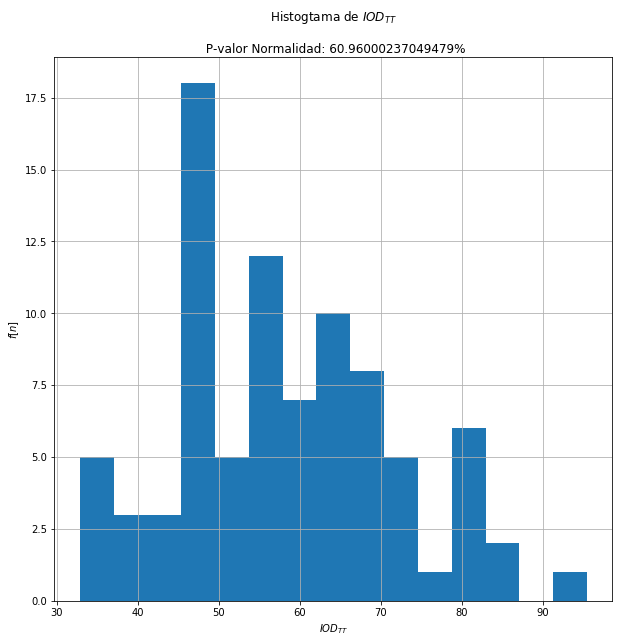

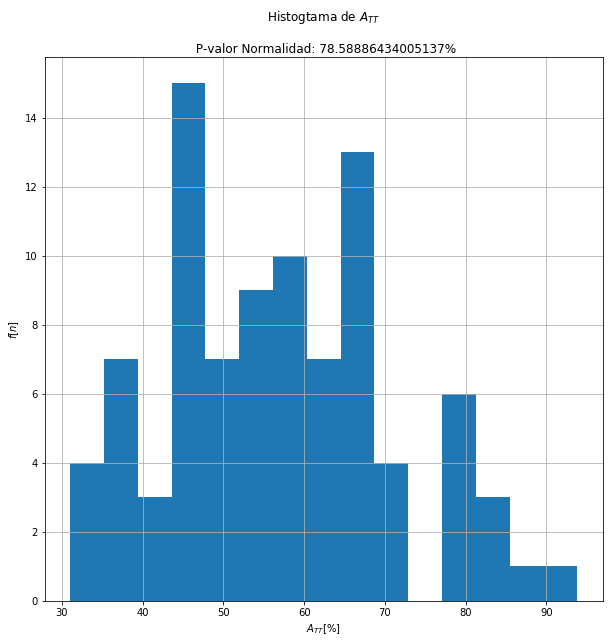

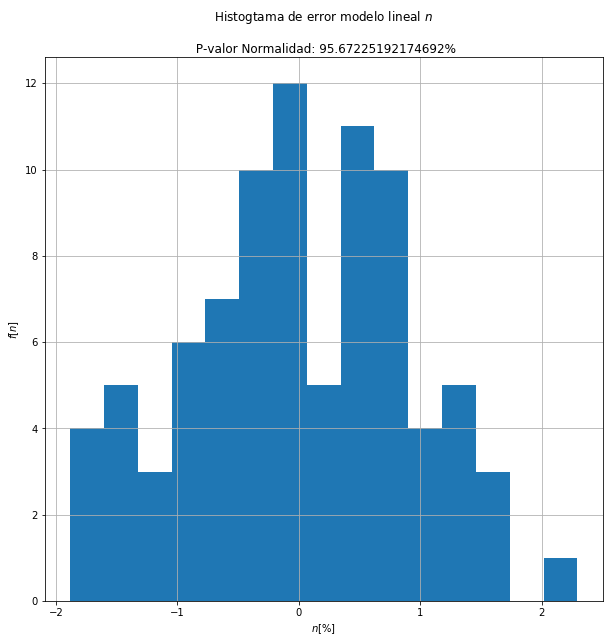

In [21]:
#normalizo
norm_IOD_TT_total_filter = norm_data(IOD_TT_total_filter_data)
norm_Area_TT_sobre_Total_filter = norm_data(Area_TT_sobre_Total_filter_data)
norm_n = norm_data(n)
norm_scatter = np.array([norm_data(scatter_data[0]),norm_data(scatter_data[1])]).transpose()

#%% aplico test de normalidad Kolmogorov Smirnovf
norm_score_IOD_TT_total_filter = stats.kstest(norm_IOD_TT_total_filter,"norm")
norm_score_Area_TT_sobre_Total_filter = stats.kstest(norm_Area_TT_sobre_Total_filter,"norm")
norm_score_n = stats.kstest(norm_n,"norm")

#%% Grafico de Figuras y valores sobre test de normalidad
plt.figure(figsize=(10,10))
plt.title('Histogtama de $IOD_{TT}$\n\n P-valor Normalidad: %s%%'%(norm_score_IOD_TT_total_filter[1]*100))
plt.hist(IOD_TT_total_filter_data.ravel(),bins=15)
plt.grid(True)
plt.xlabel("$IOD_{TT}$")
plt.ylabel('$f[n]$')

plt.figure(figsize=(10,10))
plt.title('Histogtama de $A_{TT}$\n\n P-valor Normalidad: %s%%'%(norm_score_Area_TT_sobre_Total_filter[1]*100))
plt.hist(Area_TT_sobre_Total_filter_data.ravel(),bins=15)
plt.grid(True)
plt.xlabel("$A_{TT} [\%]$")
plt.ylabel('$f[n]$')

plt.figure(figsize=(10,10))
plt.title('Histogtama de error modelo lineal $n$\n\n P-valor Normalidad: %s%%'%(norm_score_n[1]*100))
plt.hist(n.ravel(),bins=15)
plt.xlabel('$n[\%]$')
plt.ylabel('$f[n]$')
plt.grid(True)

## Homocedasticidad

para cumplir con dicha condición es necesario que el error cometido por el modelo lineal, previamente establecido, mantenga la misma varianza a lo largo de todas las observaciones es decir cada vez que el modelo se ejecute,es muy importante para definir un modelo de regresión lineal puesto que es la variable que garantiza repetibilidad en los experiemtos, mayor informacion [aqui](https://es.wikipedia.org/wiki/Homocedasticidad).

Al igual que para la Normalidad existen numerosos test que permiten verificar la homocedasticidad de un modelo basado en n variables aleatorias,el empleado en este trabajo es el más recomendable cuando se tiene muy poca información al respecto de la naturaleza de las variables y es el más utilizado ,el mismo se lo conoce como test de [**Breusch-Pagan**](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test), en este test la hipotesis nula es que debe asumirse homocedasticidad, si el p valor se encuentra por debajo del 0.05 debe rechazarse la hipotesis nula y asumirse heteroscedasticidad, para su implementacion hacemos uso de la herramienta[statsmodels](http://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het breusch pagan), la misma al recibir las variables aleatorias, nuevamente ajustadas a la distribución normal, realizara el test correspondiente y entregará el p-valor buscado.

Concluido el análisis observamos un **p-valor del 23.31%** por lo tanto no puede rechazarse la hipótesis nula y es suficiente evidencia para asumir Homocedasticidad, aun así con esta observación por sí sola no podemos asumir que el modelo de regresión lineal funcione correctamente.


In [22]:
#%% Verificacion de Homocedasticidad mediante test de Breusch-Pagan(#lm_pvalue informa probabilidad rechazar hipotesis nula)

#usamos valores normalizados ya que una de las assumpsiones del mismo es que los valores responden a una distribucion normal
#generalmente,correlacion lineal fuerte, normalidad y homoscedasticidad estan relacionados,pero hay que verificar
homoscedasticity_score= sm.stats.diagnostic.het_breuschpagan(norm_n,norm_scatter)

print("\nHomocedasticidad: %s %%"%(homoscedasticity_score[1]*100))


Homocedasticidad: 23.314666779124657 %


# Aplicación: Localización de Mayor y Menor atípico

Utilizando el error de modelo lineal, localizamos aquellas dos capturas que representen una mayor diferencia en sus parámetros y la menor de las mismas, dado a que se tratan de dos variables que miden el mismo parámetro, esto nos va a dar una idea de si es previsible la lateralización de las mismas de un modo grosero, sin embargo al tomar el error de modelo lineal como criterio, también puede darse el caso de que las capturas que se muestran, corresponden simplemente a la captura que más y/o menos le costó medir al patólogo, ya sea por su resolución,condicion,etc.

podemos observar que la muestra de menor atípico difiere a la de mayor, nada podemos decir respecto de la lateralización pero sí remarcar el el hecho de que la región frontera de las muestras en la de mayor atípico es más difuminada y resulta difícil notarlas mientras que en la de menor atípico está claramente diferenciada. Por lo tanto se puede inferir que las diferencias en el modelo lineal se deben claramente a que para el experto resultó más sencillo identificar la región termino terminal en la imagen mayor diferenciada que en la menor.


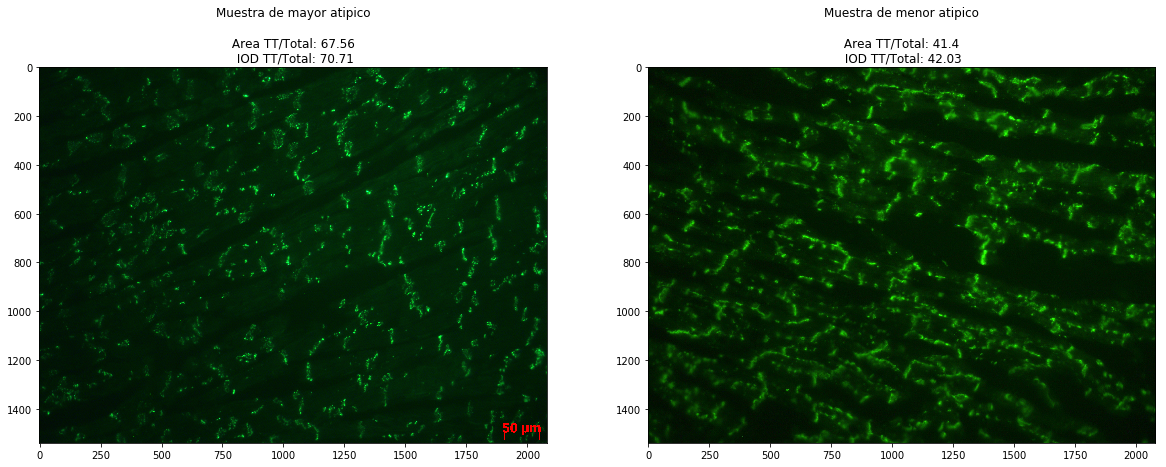

In [23]:
#%% Localizacion del mayor y menor atipico segun las diferencias en el modelo lineal.
max_aty_id = np.argmax(abs(n))
max_aty_file_path = aty_paths_list[max_aty_id]            
max_aty_AREA_TT_OV_TOTAL = (scatter_data[0])[max_aty_id]
max_aty_IOD_TT_OV_TOTAL =  (scatter_data[1])[max_aty_id]

max_aty_image = open_image(max_aty_file_path)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Muestra de mayor atipico\n\n Area TT/Total: %s \n IOD TT/Total: %s"%(max_aty_AREA_TT_OV_TOTAL,max_aty_IOD_TT_OV_TOTAL))
plt.imshow(max_aty_image[:,:,::-1])

min_aty_id = np.argmin(abs(n))
min_aty_file_path = aty_paths_list[min_aty_id]            
min_aty_AREA_TT_OV_TOTAL = (scatter_data[0])[min_aty_id]
min_aty_IOD_TT_OV_TOTAL =  (scatter_data[1])[min_aty_id]

min_aty_image = open_image(min_aty_file_path)

plt.subplot(1,2,2)
plt.title("Muestra de menor atipico\n\n Area TT/Total: %s \n IOD TT/Total: %s"%(min_aty_AREA_TT_OV_TOTAL,min_aty_IOD_TT_OV_TOTAL))
plt.imshow(min_aty_image[:,:,::-1])
plt.show()

# Clasificación según Tratamientos (TTO)

Visualizamos los histogramas, según el tipo de tratamiento empleado, a fin de poder establecer un umbral en 3 grados de lateralización, basándonos en las hipótesis de los efectos que estos tienen sobre el tejido.

para ello se ilustran los histogramas solapados para ambos parámetros de medición, clasificados según el tipo de tratamiento al que se está sometiendo la muestra, en el eje vertical se obtienen los valores del parámetro de lateralización mientras que en el eje horizontal se muestra la frecuencia de repetición de los datos. La misma no está ligada a la cantidad de muestras ya que existen muestras en las que se midieron estos parámetros y en otras algunos fueron medidos y otros no, ver Tabla I. 

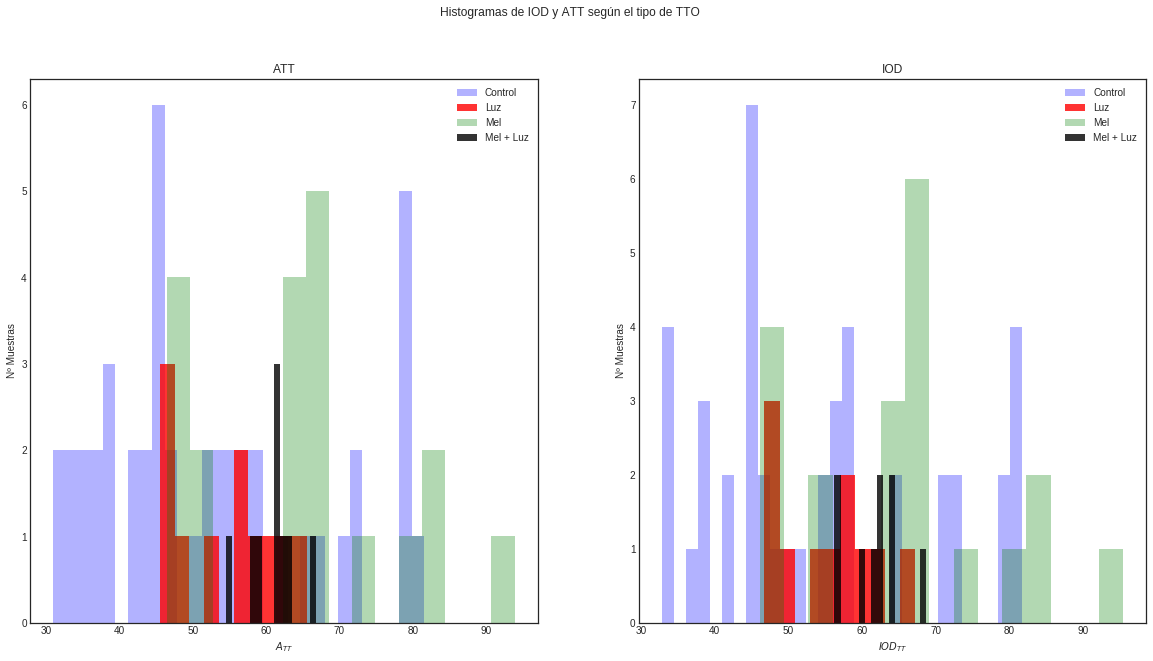

In [117]:
#%% Clasificacion de clases
data = IOD_TT_total_filter_data.transpose()
list_class = IOD_TT_total_filter[2]

IOD_TT_total_filter_control = np.array(clasificador(data,list_class,"control"))
IOD_TT_total_filter_Luz = np.array(clasificador(data,list_class,"Luz"))
IOD_TT_total_filter_Mel = np.array(clasificador(data,list_class,"Mel"))
IOD_TT_total_filter_melPlusLuz = np.array(clasificador(data,list_class,"Mel+Luz"))

data = Area_TT_sobre_Total_filter_data.transpose()
list_class = Area_TT_sobre_Total_filter[2]

Area_TT_sobre_Total_filter_control = np.array(clasificador(data,list_class,"control"))
Area_TT_sobre_Total_filter_Luz = np.array(clasificador(data,list_class,"Luz"))
Area_TT_sobre_Total_filter_Mel = np.array(clasificador(data,list_class,"Mel"))
Area_TT_sobre_Total_filter_melPlusLuz = np.array(clasificador(data,list_class,"Mel+Luz"))

plt.figure(figsize=(20,10))
plt.style.use('seaborn-white')
plt.suptitle("Histogramas de IOD y ATT según el tipo de TTO")
plt.subplot(1,2,1)
plt.title('ATT')
plt.hist(Area_TT_sobre_Total_filter_control,bins=30,alpha = 0.3,histtype='stepfilled',color='blue',
         orientation='vertical',label='Control')
plt.hist(Area_TT_sobre_Total_filter_Luz,bins=10,alpha = 0.8,histtype='bar',color = 'red',
        orientation='vertical',label='Luz')
plt.hist(Area_TT_sobre_Total_filter_Mel,bins=15,alpha = 0.3,histtype='stepfilled',color = 'green',
        orientation='vertical',label='Mel')
plt.hist(Area_TT_sobre_Total_filter_melPlusLuz,bins=15,alpha = 0.8,histtype='bar',color = 'black',
         orientation='vertical',label='Mel + Luz')
plt.xlabel("$A_{TT}$")
plt.ylabel("Nº Muestras")
plt.legend()
plt.subplot(1,2,2)
plt.title('IOD')
plt.hist(IOD_TT_total_filter_control,bins=30,alpha = 0.3,histtype='stepfilled',color='blue',
         orientation='vertical',label='Control')
plt.hist(IOD_TT_total_filter_Luz,bins=10,alpha = 0.8,histtype='bar',color = 'red',
        orientation='vertical',label='Luz')
plt.hist(IOD_TT_total_filter_Mel,bins=15,alpha = 0.3,histtype='stepfilled',color = 'green',
        orientation='vertical',label='Mel')
plt.hist(IOD_TT_total_filter_melPlusLuz,bins=15,alpha = 0.8,histtype='bar',color = 'black',
         orientation='vertical',label='Mel + Luz')
plt.legend()
plt.xlabel("$IOD_{TT}$")
plt.ylabel("Nº Muestras")
plt.show()

